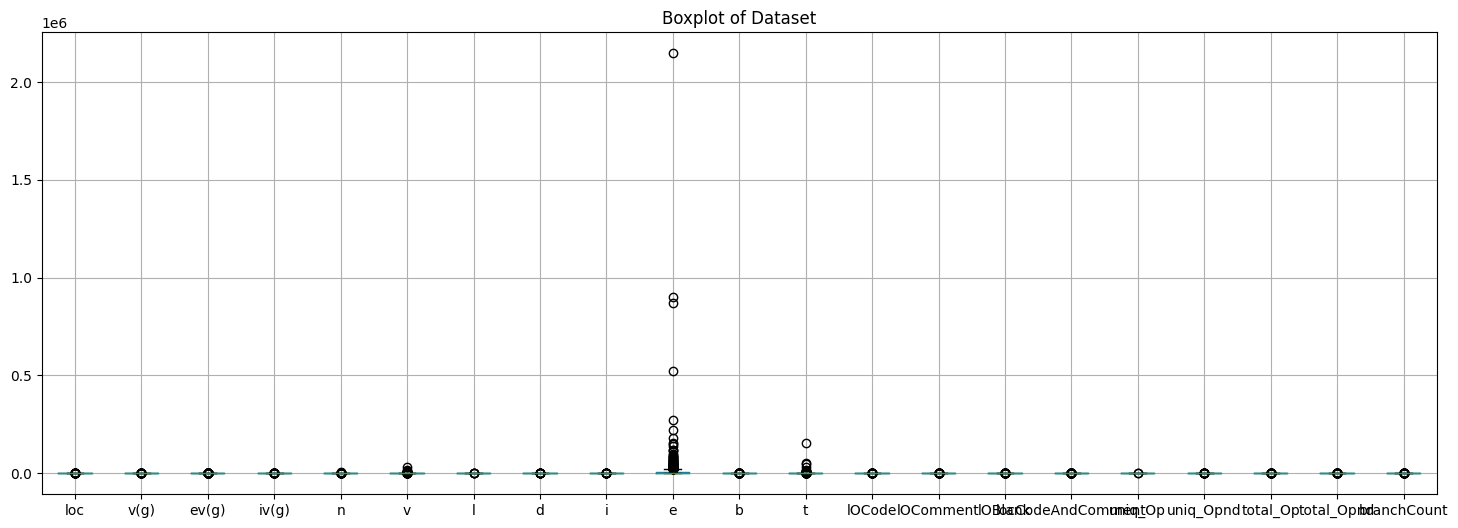

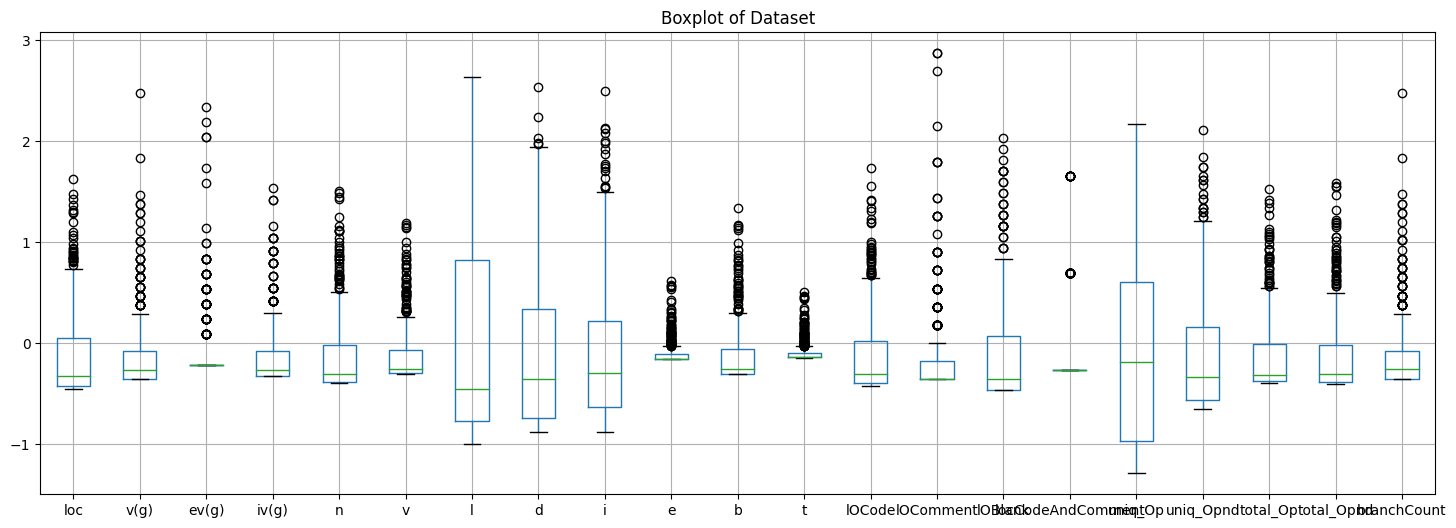

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Step 2: Load the dataset
data = pd.read_csv("KC2.csv")
data = data.replace('?', np.nan)
data = data.dropna()

plt.figure(figsize=(18, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()



numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
exclude_column = 'problems'  # Specify the column to exclude

columns_to_process = [col for col in numeric_columns if col != exclude_column]


scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])



z_scores = np.abs((data.loc[:, columns_to_process] - data.loc[:, columns_to_process].mean()) / data.loc[:, columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data.loc[(z_scores < threshold).all(axis=1)]

plt.figure(figsize=(18, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()


In [34]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
1,-0.460962,-0.355043,-0.217331,-0.329333,-0.401838,-0.305372,2.635010,-0.788525,-0.848600,-0.163853,...,-0.415910,-0.179317,-0.362710,0.692598,-1.290147,-0.610270,-0.396290,-0.398877,-0.354221,yes
5,1.619445,1.012790,1.584845,0.913344,1.482229,1.189219,-0.887845,2.032378,1.733811,0.610154,...,1.727954,0.000000,1.701179,-0.271498,1.542677,1.746351,1.416754,1.583141,1.014283,yes
6,1.478183,0.556846,0.533575,0.913344,1.447895,1.142412,-0.887845,1.980925,1.698712,0.572349,...,1.339573,2.869079,1.375302,-0.271498,1.385298,1.610392,1.388753,1.538850,0.558115,yes
7,-0.435278,-0.355043,-0.217331,-0.329333,-0.401838,-0.305923,-0.996800,-0.878794,-0.879661,-0.163861,...,-0.415910,-0.358635,-0.471336,-0.271498,-1.290147,-0.655589,-0.396290,-0.409950,-0.354221,no
8,-0.294016,-0.263854,-0.217331,-0.205066,-0.311711,-0.257458,-0.379392,-0.356137,-0.407223,-0.159362,...,-0.307163,-0.358635,-0.362710,-0.271498,-0.031114,-0.338352,-0.312288,-0.310295,-0.262987,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.422436,-0.355043,-0.217331,-0.329333,-0.384671,-0.299529,0.819105,-0.698256,-0.699507,-0.163656,...,-0.400375,-0.358635,-0.471336,-0.271498,-0.818009,-0.610270,-0.375289,-0.398877,-0.354221,yes
518,-0.422436,-0.355043,-0.217331,-0.329333,-0.388962,-0.301517,1.436513,-0.743390,-0.714106,-0.163755,...,-0.400375,-0.358635,-0.471336,-0.271498,-0.975388,-0.610270,-0.382290,-0.398877,-0.354221,yes
519,-0.422436,-0.355043,-0.217331,-0.329333,-0.388962,-0.301517,1.436513,-0.743390,-0.714106,-0.163755,...,-0.400375,-0.358635,-0.471336,-0.271498,-0.975388,-0.610270,-0.382290,-0.398877,-0.354221,yes
520,-0.422436,-0.355043,-0.217331,-0.329333,-0.384671,-0.299529,1.436513,-0.743390,-0.639249,-0.163708,...,-0.400375,-0.358635,-0.471336,-0.271498,-0.975388,-0.564950,-0.382290,-0.387804,-0.354221,yes


In [35]:
data['problems'] = data['problems'].map({'yes': 1, 'no': 0})
X = data.drop('problems', axis=1)
y = data['problems']

data = data.dropna(subset=['problems'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)


In [37]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error: 0.8175365029098575
R-squared: -2.540894332495335


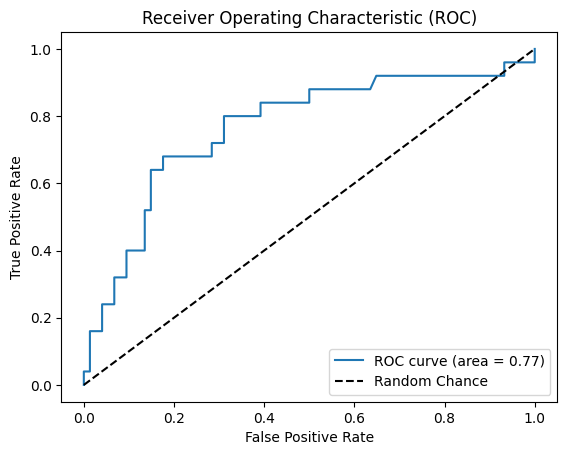

In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7878787878787878
Confusion Matrix:
[[72  2]
 [19  6]]
AUC: 0.791081081081081
Root Mean Squared Error: 0.4605661864718383
R-squared: 0.7878787878787878


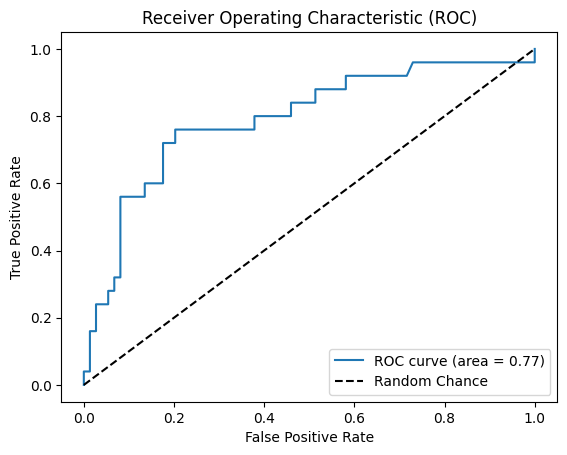

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(probability=True)

model.fit(X_train, y_train)
y_pred_prob = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Accuracy: 0.7676767676767676
Root Mean Squared Error: 0.48199920365414745
R-squared: 0.7676767676767676


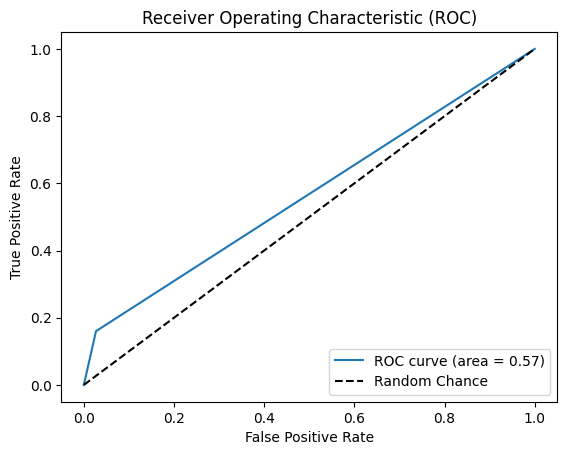

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()